In [1]:
import pandas as pd
import os

BASE_DIR=os.path.dirname(os.getcwd())
DATA_DIR=os.path.join(BASE_DIR,"data")
os.makedirs(DATA_DIR,exist_ok=True)

df=pd.read_json(os.path.join(DATA_DIR,"problems_data.jsonl"),lines=True)

textColumns=["title","description","input_description","output_description","sample_io"]

for col in textColumns:
    df[col]=df[col].fillna("")
    df[col]=df[col].apply(lambda x:str(x))


df["text"]=(df["title"]+" "+df["description"]+" "+df["input_description"]+" "+df["output_description"]+" "+df["sample_io"])

df["text"]=df["text"].str.lower()
df["text"]=df["text"].str.replace("\n"," ")
df["text"]=df["text"].str.replace("\t"," ")
df["text"]=df["text"].apply(lambda x:" ".join(x.split()))

print(df["problem_class"].value_counts())
print()
print(df["problem_score"].describe())


print()
class_means = df.groupby("problem_class")["problem_score"].mean()
print(class_means)


df.to_csv(os.path.join(DATA_DIR,"cleaned_data.csv"),index=False)

problem_class
hard      1941
medium    1405
easy       766
Name: count, dtype: int64

count    4112.000000
mean        5.114689
std         2.177770
min         1.100000
25%         3.300000
50%         5.200000
75%         6.900000
max         9.700000
Name: problem_score, dtype: float64

problem_class
easy      1.970888
hard      7.071149
medium    4.125836
Name: problem_score, dtype: float64


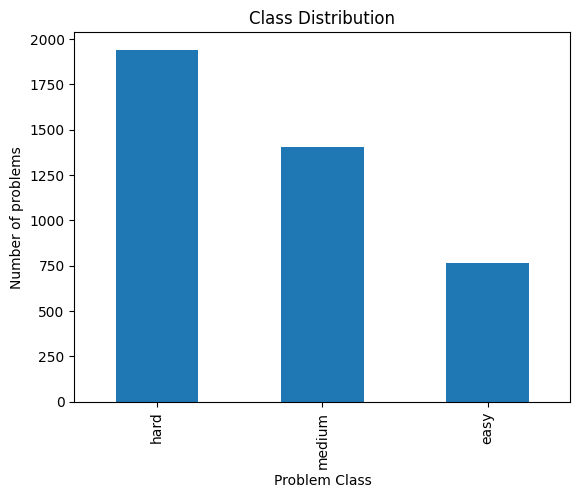

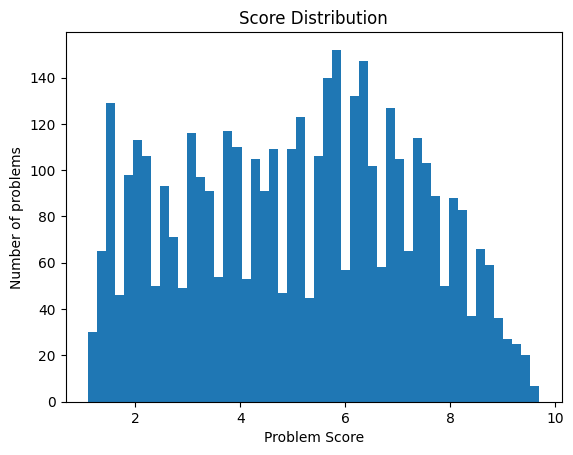

In [2]:
import matplotlib.pyplot as plt

# plt.style.use("dark_background")
plt.figure()
df["problem_class"].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Problem Class")
plt.ylabel("Number of problems")
plt.show()

plt.figure()
plt.hist(df["problem_score"],bins=50)
plt.title("Score Distribution")
plt.xlabel("Problem Score")
plt.ylabel("Number of problems")
plt.show()